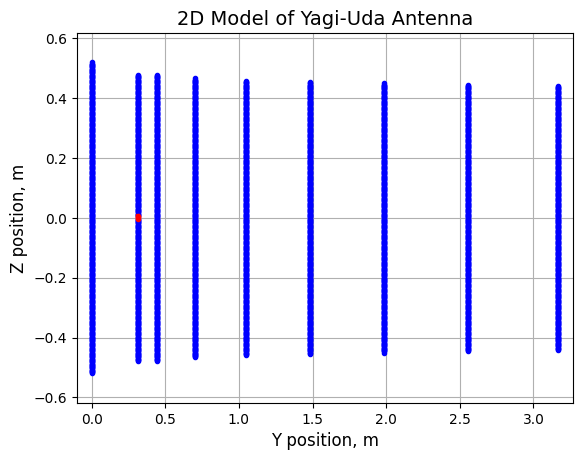

In [ ]:

import better 

import numpy as np
from geometry import calculate_positions
from matrix_elements_Pocklington import calculate_impedance_Pocklington
from matrix_elements_Pocklington import calculate_voltage_Pocklington
from visualization import plot_2dmodel

#* Define constants
light_speed, mu0, eps0, frequency = 299792458., 4*np.pi*1e-7, 8.854e-12, 1e6 * 146 #* Also define an operating frequency 
omega = 2 * np.pi * frequency
#* Calculate some parametres of system
wavelength, wavenumber = light_speed / frequency, omega / light_speed
#* Space resolution of system
delta_z = wavelength/5e2 #! number of sigments for each lambda length

#* set geometry of antenna
element_position = np.array([0.0, 0.312, 0.447, 0.699, 1.05, 1.482, 1.986, 2.553, 3.168])
element_length = np.array([1.038, 0.955, 0.956, 0.932, 0.916, 0.906, 0.897, 0.891, 0.887])
wire_radius = 3.175e-3
source_position = np.array([[0,element_position[1],0]], dtype = float)


incident_field = 10
element_num, R_block, R = calculate_positions(element_length, element_position, frequency, delta_z)

plot_2dmodel(R_block,source_position, sum(element_num), delta_z)

In [33]:
impedance = calculate_impedance_Pocklington(R_block, element_num, wire_radius, delta_z, omega)
voltage_block, voltage = calculate_voltage_Pocklington(R_block, element_num, source_position, incident_field, delta_z)
current = np.linalg.solve(impedance, voltage)

100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


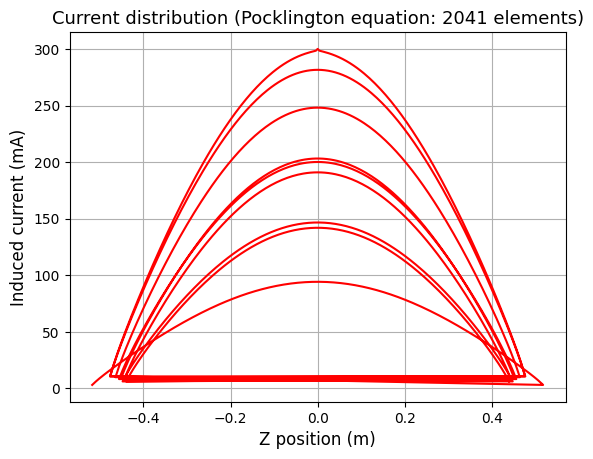

In [34]:
import matplotlib.pyplot as plt
plt.plot(R[:,2], np.abs(current)*1000, color = 'red', zorder = np.inf)
plt.title(f"Current distribution (Pocklington equation: {sum(element_num)} elements)", size = 13)
plt.ylabel("Induced current (mA)", size = 12)
plt.xlabel("Z position (m)", size = 12)
plt.grid(zorder = 0)

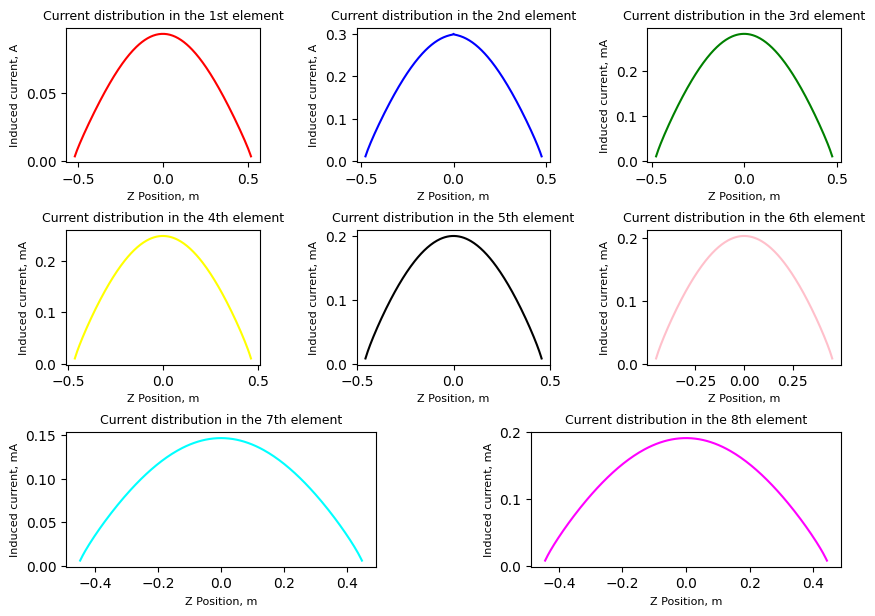

In [35]:
plt.figure(figsize=(10, 7))

#* Deploying a block matrix (reshape)
num_elements = sum(element_num)
element_currents = []
cum_n = np.append(0, np.cumsum(element_num))
for i in range (len(cum_n)-1):
    element_currents.append(current[cum_n[i]:cum_n[i+1]])

plt.subplot(3, 3, 1)  
plt.plot(R_block[0][:,2], np.abs(element_currents[0]), color = 'red')
plt.title(f'Current distribution in the 1st element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, A', size = 8)
plt.subplot(3, 3, 2)
plt.plot(R_block[1][:,2], np.abs(element_currents[1]), color = 'blue')
plt.title(f'Current distribution in the 2nd element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, A', size = 8)
plt.subplot(3, 3, 3)
plt.plot(R_block[2][:,2], np.abs(element_currents[2]), color = 'green')
plt.title(f'Current distribution in the 3rd element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)
plt.subplot(3, 3, 4)
plt.plot(R_block[3][:,2], np.abs(element_currents[3]), color = 'yellow')
plt.title(f'Current distribution in the 4th element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)
plt.subplot(3, 3, 5)
plt.plot(R_block[4][:,2], np.abs(element_currents[4]), color = 'black')
plt.title(f'Current distribution in the 5th element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)
plt.subplot(3, 3, 6)
plt.plot(R_block[5][:,2], np.abs(element_currents[5]), color = 'pink')
plt.title(f'Current distribution in the 6th element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)

plt.subplot(3, 2, 5)
plt.plot(R_block[6][:,2], np.abs(element_currents[6]), color = 'cyan')
plt.title(f'Current distribution in the 7th element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)
plt.subplot(3, 2, 6)
plt.plot(R_block[7][:,2], np.abs(element_currents[7]), color = 'magenta')
plt.title(f'Current distribution in the 8th element', size = 9)
plt.xlabel('Z Position, m', size = 8)
plt.ylabel('Induced current, mA', size = 8)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

plt.show()

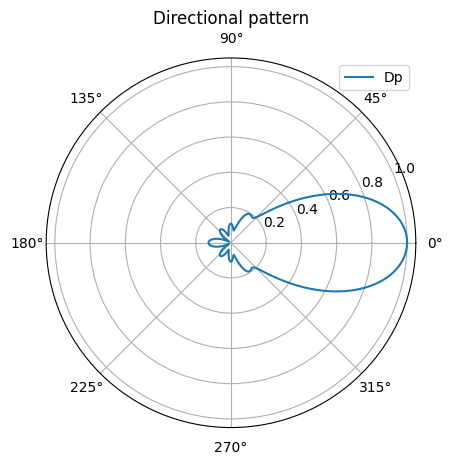

In [36]:
from directional_pattern import calculate_dp
P = calculate_dp(R_block, current, element_length, element_num, delta_z, wavenumber)